In [524]:
# Group Members:
# Fauzan Amjad - fa408
# Moeez Shahid - ms2978
# Mahad Rauf - mar648
# Shivan Suratia - ss3424
# Import Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [525]:
# Pre-Processing - Task 1
def pre_1(A):
    #print(len(A)) -> Output: 10841
    A = A[A.Reviews != "3.0M"]
    #print(len(A)) -> Output: 10840 -> Deleted one record
    return A

In [526]:
# Pre-Processing - Task 2
def pre_2(A):
    # print(len(A)) -> Output: 10840
    for column in A:
        A = A.loc[A[column] != "Varies with device"]
    # print(len(A)) -> Output: 9059 -> Deleted  1781 records
    return(A)

In [527]:
# Pre-Processing - Task 3
def pre_3(A):
    #print(A["Android Ver"])
    for index in A.index:
        version = str(A.loc[index,"Android Ver"])
        version = version[0:3]
        new_version = float(version)
        A.loc[index,"Android Ver"] = new_version
    #print("------------------------")
    #print(A["Android Ver"])
    return(A)

In [528]:
# Pre-Processing - Task 4
def pre_4(A):
    #print(len(A)) #-> 9059
    #print(A["Installs"])
    for index in A.index:
        install = str(A.loc[index,"Installs"])
        install_no_commas = install.replace(',',"")
        install_no_commas_and_other = install_no_commas.replace('+',"")
        if install_no_commas_and_other.isdigit():
            A.loc[index,"Installs"] = int(install_no_commas_and_other)
        else: 
            A.loc[index,"Installs"] = -100
    A = A[A.Installs != -100]
    A.reset_index(drop = True)
    #print("------------------------")
    #print(A["Installs"]) 
    #print(len(A)) #-> 9059
    return A;

In [529]:
# Pre-Processing - Task 5 
def pre_5(f):
    # print(f["Rating"].isna().sum()) #-> 1416 
    for i in f.index:
        rating = f.loc[i,'Rating']
        if(np.isnan(rating)):
            installs = f.loc[i,"Installs"]
            reviews = f.loc[i, 'Reviews']
            if int(installs) < 50000 and int(reviews) < 100:
                f.loc[i,'Rating'] = -100
                #f = f.drop(f.index[i])
                #f = f.reset_index(drop = True)
            else: 
                category_to_check = f.loc[i,'Category']
                sum_of_ratings = 0
                frequency_of_ratings = 0
                for check_index in f.index:
                    check_rating = f.loc[check_index,'Rating']
                    if f.loc[check_index,'Category'] == category_to_check and (not np.isnan(check_rating)):
                        sum_of_ratings = sum_of_ratings + f.loc[check_index,'Rating']
                        frequency_of_ratings = frequency_of_ratings + 1

                # Prevents a Zero Denominator
                if frequency_of_ratings != 0:
                    average_of_category = sum_of_ratings/frequency_of_ratings
                    f.loc[i,'Rating'] = round(average_of_category,2)
                else:
                    f.loc[i,'Rating'] = -100
    f = f[f.Rating != -100]
    f = f.reset_index(drop = True)
    # print(f["Rating"].isna().sum()) #-> 0
    return(f)

In [530]:
# Pre-Processing - Task 6
def pre_6(A):
    #print(A["Size"])
    for index in A.index:
        pre_size = str(A.loc[index,"Size"])
        if 'M' in pre_size:
            new_size = float(pre_size[:-1])
            new_size = new_size*1000000
            A.loc[index,"Size"] = new_size
        elif 'K' in pre_size:
            new_size = float(pre_size[:-1])
            new_size = new_size*1000
            A.loc[index,"Size"] = new_size
    #print(A["Size"])
    return A

In [531]:
# Pre-Processing - All Tasks
def preprocessing(A):
    A = pre_1(A)
    #print(len(A)) #-> 10840 elements
    A = pre_2(A)
    #print(len(A)) #-> 9059 elements
    A = pre_3(A)
    #print(len(A)) #-> 9059 elements
    A = pre_4(A)
    #print(len(A)) #-> 9059 elements
    A = pre_5(A)
    #print(len(A)) #-> 7685 elements
    A = pre_6(A)
    #print(len(A)) #-> 7685 elements
    return(A)

In [532]:
# Analysis - Task 1
def analysis_1(A):
    for column in A:
        print("******* "+column + " Column Statistics Description *******")
        print(A[column].describe())
        print("---------------------------------------")

In [533]:
# Analysis - Task 2
def analysis_2(B, numeric_column):
    free_apps = B[B.Price == 0]
    ratings = {}
    for index in free_apps.index:
        current_category = free_apps.loc[index,'Category']
        if current_category in ratings:
            ratings[current_category].append((free_apps.loc[index,'App'], free_apps.loc[index,numeric_column]))
        else:
            ratings[current_category] = [(free_apps.loc[index,'App'], free_apps.loc[index,numeric_column])]
    array = []
    column_values = ["Category", "App", numeric_column]
    for key in ratings:
        ratings[key] = sorted(ratings[key], key = lambda x: x[1])
        ratings[key].reverse()
        if len(ratings[key]) == 1:
            array.append([key,ratings[key][0][0], ratings[key][0][1]])
        elif len(ratings[key]) == 2:
            array.append([key,ratings[key][0][0], ratings[key][0][1]])
            array.append([key,ratings[key][1][0], ratings[key][1][1]])
        else:
            array.append([key,ratings[key][0][0], ratings[key][0][1]])
            array.append([key,ratings[key][1][0], ratings[key][1][1]])
            array.append([key,ratings[key][2][0], ratings[key][2][1]])
    return(pd.DataFrame(data = array, columns = column_values))
    

In [534]:
# Analysis - Task 3
def analysis_3(A):
    paid_apps = A[A.Price != 0]
    print("Paid App Statistics")
    print("Maximum Price: " + str(paid_apps['Price'].max()))
    print("Minimum Price: " + str(paid_apps['Price'].min()))
    print("Average Price: " + str(paid_apps['Price'].mean()))
    print("---------------------------------------")

In [535]:
# Visualization - Task 1
def visualization_1(A):
    genre_freq_dict = {}
    for index in A.index:
        genres_string = A.loc[index, "Genres"]
        genres_list = genres_string.split(';')
        for g in genres_list:
            if g in genre_freq_dict:
                genre_freq_dict[g] = genre_freq_dict[g] + 1
            else:
                genre_freq_dict[g] = 1
    
    # Makes the Pie Chart
    print("App Genres Pie Chart")
    plt.pie(genre_freq_dict.values(), labels=genre_freq_dict.keys())
    plt.axis('equal')
    plt.show()
    print("---------------------------------------")

In [536]:
# Visualization - Task 2
def visualization_2(A):
    business_df = A[A.Category == "BUSINESS"]
    education_df = A[A.Category == "EDUCATION"]
    business_df_ratings = business_df['Rating']
    education_df_ratings = education_df['Rating']
    plt.boxplot([business_df_ratings,education_df_ratings], labels = ['Business Ratings', 'Education Ratings'])
    plt.show()

******* App Column Statistics Description *******
count       7685
unique      7000
top       ROBLOX
freq           9
Name: App, dtype: object
---------------------------------------
******* Category Column Statistics Description *******
count       7685
unique        33
top       FAMILY
freq        1611
Name: Category, dtype: object
---------------------------------------
******* Rating Column Statistics Description *******
count    7685.000000
mean        4.136582
std         0.873396
min       -16.900000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
---------------------------------------
******* Reviews Column Statistics Description *******
count     7685
unique    4610
top          2
freq        83
Name: Reviews, dtype: int64
---------------------------------------
******* Size Column Statistics Description *******
count         7685.0
unique         411.0
top       14000000.0
freq           165.0
Name: Size, dtype

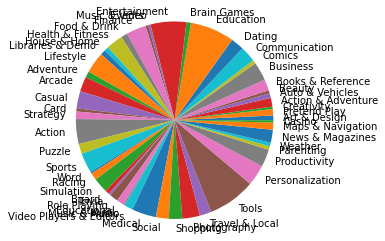

---------------------------------------


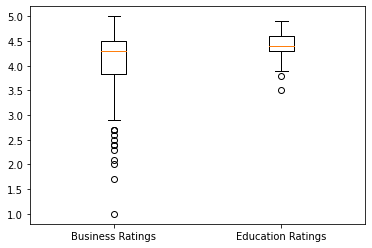

In [537]:
# This is where you load the file
def main():
    
    # Input Data Set
    data = pd.read_excel('GooglePlaystore.xlsx')
    
    # Preprocessing - 15 points
    data = preprocessing(data)
    
    # Analysis - 10 Points
    analysis_1(data)
    print(analysis_2(data,'Rating'))
    print("---------------------------------------")
    print(analysis_2(data,'Installs'))
    print("---------------------------------------")
    print(analysis_2(data,'Reviews'))
    print("---------------------------------------")
    analysis_3(data)
    
    # Visualization - 10 Points
    visualization_1(data)
    visualization_2(data)
    
main()